In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = (16,8)

# handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# time series related imports
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima


In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + VISITOR ATTENTION INDEX - DATA COMPOSITION 3 (90-5-5).csv', index_col="Month", parse_dates=True)
df.head()

,Tourist Arrival,Airbnb Vietnam,Vietnam restaurant,Shopping in Hanoi,Shopping in Ho Chi Minh,Vietnam tour,Skyscanner,Vietnam visa,Vietnam airport,Vietnam flights,...,Hoi An,Vietnam weather,Visa for Vietnam,Sgn airport,Phu Quoc,Vietnam itinerary,Vietnam trip,Things to do in Hue,Vietnam backpackers,Class
Month,,,,,,,,,,,,,,,,,,,,,
2008-01-01,399556,11,59,32,8,58,7,69,52,73,...,27,58,29,18,20,0,32,0,8,Train
2008-01-02,411032,0,51,0,0,46,6,61,35,53,...,27,58,31,10,19,5,39,7,5,Train
2008-01-03,414332,0,57,7,24,58,6,61,51,57,...,27,50,29,38,28,6,30,0,0,Train
2008-01-04,395900,0,51,6,9,58,6,66,43,53,...,27,41,30,25,22,8,45,0,8,Train
2008-01-05,366387,0,57,0,7,57,6,63,46,58,...,27,44,24,16,22,5,47,0,9,Train


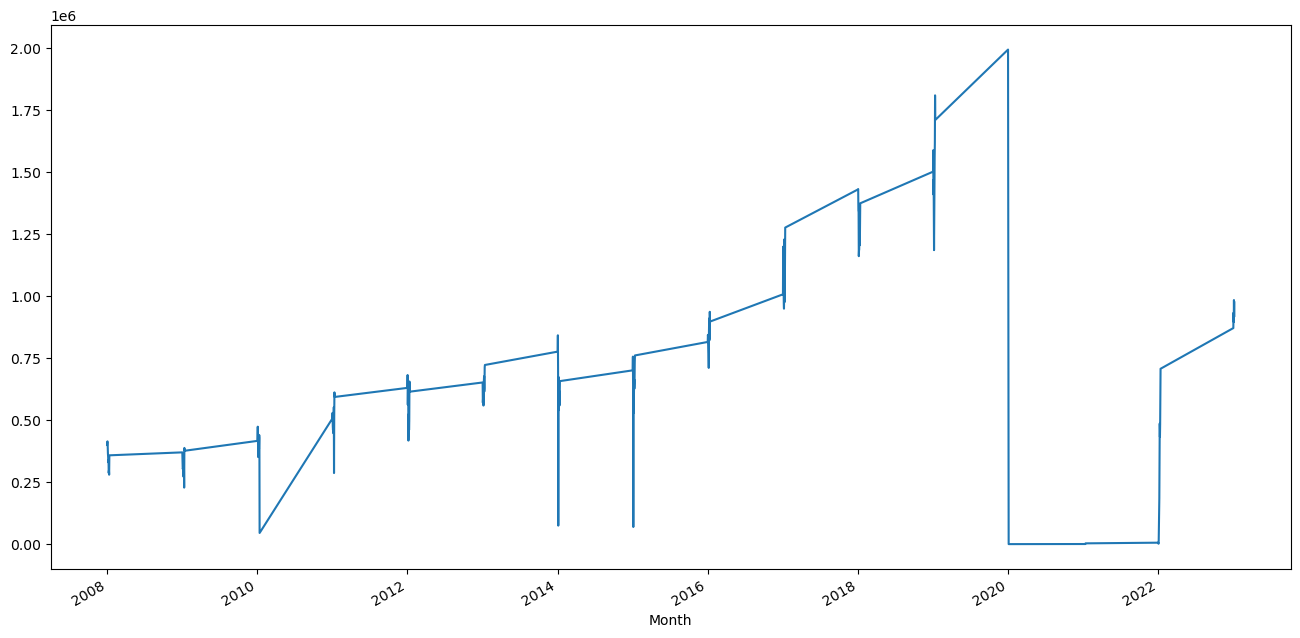

In [3]:
fig, ax = plt.subplots(figsize=(16,8))
ax = df['Tourist Arrival'].plot()
color_arr = ['g', 'r', 'm', 'b', 'y', 'k']
c_indx = 0
for x in df[df['Tourist Arrival']==1].index:
    ax.axvline(x=x, color=color_arr[c_indx], linewidth=0.5)
    if color_arr[c_indx] == 'k':
        c_indx = 0
    else:
        c_indx +=1

In [4]:
df1=df.drop(["Class"], axis=1)
print(df1)

            Tourist Arrival  Airbnb Vietnam  Vietnam restaurant  \
Month                                                             
2008-01-01           399556              11                  59   
2008-01-02           411032               0                  51   
2008-01-03           414332               0                  57   
2008-01-04           395900               0                  51   
2008-01-05           366387               0                  57   
...                     ...             ...                 ...   
2023-01-02           932969              64                  88   
2023-01-03           895425              65                  84   
2023-01-04           984146              58                  90   
2023-01-05           916257              56                  82   
2023-01-06           975010              63                  86   

            Shopping in Hanoi  Shopping in Ho Chi Minh  Vietnam tour  \
Month                                                   

In [5]:
auto_arima(df1['Tourist Arrival'], m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4947.042, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4937.754, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4938.437, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4945.121, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4948.808, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=4939.754, Time=0.17 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=4939.754, Time=0.13 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=4938.184, Time=0.06 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=4940.975, Time=0.27 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=4935.707, Time=0.05 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=4937.707, Time=0.11 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=4937.707, Time=0.10 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=4936.131, Time=0.04 sec
 ARIMA(0,1,0)(2,0,1)[12]

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [6]:
train = df1['Tourist Arrival'][:'01/12/2021'].dropna()
test = df1['Tourist Arrival']['01/01/2022':].dropna()
exog_train = df1.drop(['Tourist Arrival'], axis=1)[:'01/12/2021'].dropna()
exog_test = df1.drop(['Tourist Arrival'], axis=1)['01/01/2022':].dropna()

In [7]:
import statsmodels.api as sm
model = SARIMAX(train,order=(0,1,0),seasonal_order=(1,0,0,12),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
results.summary()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20930D+01    |proj g|=  9.51914D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21      0      1      0     0     0   9.519D-06   1.209D+01
  F =   12.092969636384087     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Tourist Arrival   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -2031.619
Date:                            Wed, 23 Aug 2023   AIC                           4105.238
Time:                                    22:02:55   BIC                           4169.150
Sample:                                         0   HQIC                          4131.197
                                            - 168                                         
Covariance Type:                              opg                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Airbnb Vietnam           -528.4466   2122.917     -0.249      0.803   -4689.288    3632.394
Vietnam restaurant       2335.7941   2701.253      0.865      0.387   -2958.565    7630.153
Shopping in Hanoi         632.1599   2608.120      0.242      0.808   -4479.660    5743.980
Shopping in Ho Chi Minh   854.8650   2902.330      0.295      0.768   -4833.598    6543.328
Vietnam tour             2399.5940   3501.041      0.685      0.493   -4462.321    9261.509
Skyscanner               4927.9598   3469.512      1.420      0.156   -1872.158    1.17e+04
Vietnam visa             4774.3131   3093.330      1.543      0.123   -1288.502    1.08e+04
Vietnam airport          -133.6598   3560.628     -0.038      0.970   -7112.362    6845.043
Vietnam flights         -3049.5400   3332.497     -0.915      0.360   -9581.114    3482.034
Danang airport            422.3091   1628.894      0.259      0.795   -2770.265    3614.884
Hoi An                  -2881.0121   1650.950     -1.745      0.081   -6116.815     354.790
Vietnam weather           219.0668   2190.668      0.100      0.920   -4074.563    4512.696
Visa for Vietnam         2843.2282   3859.262      0.737      0.461   -4720.787    1.04e+04
Sgn airport              1337.6689   1881.109      0.711      0.477   -2349.238    5024.576
Phu Quoc                 3842.0305   1702.245      2.257      0.024     505.691    7178.370
Vietnam itinerary       -2440.0899   2339.386     -1.043      0.297   -7025.202    2145.022
Vietnam trip             4449.8092   1871.679      2.377      0.017     781.386    8118.233
Things to do in Hue      4453.5511   3021.120      1.474      0.140   -1467.735    1.04e+04
Vietnam backpackers     -6006.3702   2731.218     -2.199      0.028   -1.14e+04    -653.281
ar.S.L12                    0.3657      0.067      5.497      0.000       0.235       0.496
sigma2                    1.42e+10      0.004   3.31e+12      0.000    1.42e+10    1.42e+10
===================================================================================
Ljung-Box (L1) (Q):                  15.89   Jarque-Bera (JB):               231.05
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                            -0.28
Prob(H) (two-sided):                  0.49   Kurtosis:                         8.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.61e+27. Standard errors may be unstable.
"""

In [8]:
start = len(train)
end = len(train) + len(test) - 1
y_pred = results.predict(start=start,end=end, exog = exog_test, dynamic=False).rename('SARIMA(0,1,0)(1,0,[0],12) Predictions')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [9]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [10]:
RMSE = np.sqrt(mean_squared_error(test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 302014.5790373743


In [11]:
MAE = mean_absolute_error(test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 267924.07127034856


In [12]:
MAPE = mean_absolute_percentage_error(test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 12.837856376067112


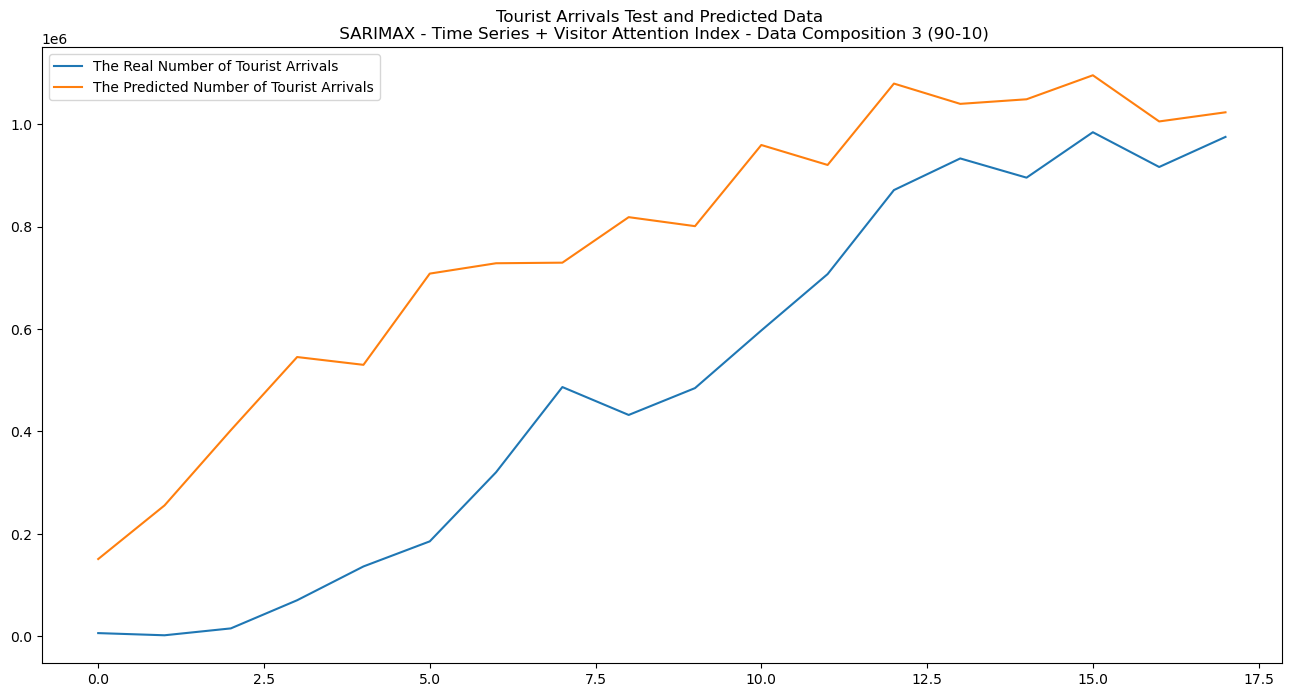

In [13]:
x_ax = range(len(test))
plt.plot(x_ax, test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n SARIMAX - Time Series + Visitor Attention Index - Data Composition 3 (90-10)")
plt.legend()
plt.show()